In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.utils import resample
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



Here we import the panda, sklearn and imblearn python libraries needed for our processing, in order to efficiently manipulate and analyze our data.

The classic method would be to import the .csv files directly from the local drive, but this is a very time-consuming process. So we decided to import the files from a drive, which considerably reduces import time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
individuals_data=pd.read_csv('/content/drive/MyDrive/DATA/train_identity.csv')
transactions_data=pd.read_csv('/content/drive/MyDrive/DATA/train_transaction.csv')

In [ ]:
#Getting the top five rows of the dataframe related to train_identity
individuals_data.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:

#Getting the top five rows of the dataframe related to train_transaction
transactions_data.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Since we have two pieces of data with a TransationID column in common, we concatenate them to create a single dataframe so as to have only one dataset for our analysis
merged_data1 = pd.merge(transactions_data, individuals_data, on='TransactionID', how='left')
merged_data1.info()
#Getting the top five rows of our new dataframe
merged_data1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


Along the way, we noticed that the compilations were taking a long time, due to the complexity and density of the dataset data. Here's the proof (embed an image). So we created a function to optimize memory usage(see above).

In [ ]:
# La fonction d'optimisation renvoie un dataframe optimisé en remplaçant les types de données par des types moins "mémoir_ovores".

def optimiser_utilisation_memoire(df):
    # Parcourir chaque colonne dans le DataFrame
    for col in df.columns:
        dtype_colonne = df[col].dtype

        # Convertir le type de données object en category si le nombre de valeurs uniques est inférieur à 50 % du nombre total de lignes
        if dtype_colonne == 'object':
            nb_valeurs_uniques = len(df[col].unique())
            nb_valeurs_totales = len(df[col])
            if nb_valeurs_uniques / nb_valeurs_totales < 0.5:
                df[col] = df[col].astype('category')

        # Convertir le type de données int64 en int32 si les valeurs se situent dans la plage de int32
        elif dtype_colonne == 'int64':
            min_colonne = df[col].min()
            max_colonne = df[col].max()
            if min_colonne > -2147483648 and max_colonne < 2147483647:
                df[col] = df[col].astype('int32')

        # Convertir le type de données float64 en float32 si les valeurs se situent dans la plage de float32
        elif dtype_colonne == 'float64':
            min_colonne = df[col].min()
            max_colonne = df[col].max()
            if min_colonne > -3.4028235e+38 and max_colonne < 3.4028235e+38:
                df[col] = df[col].astype('float32')

    return df

In [ ]:
merged_data=optimiser_utilisation_memoire(merged_data1)
merged_data.info()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: category(31), float32(399), int32(4)
memory usage: 931.6 MB


Let's start exploring the data.

In [ ]:
#Here we visualize the rate of missing values proportion
missing_values = merged_data.isnull().sum()
print(missing_values)

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64


In [ ]:


# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title('Overall view of the dataset')
plt.xlabel('Variables')
plt.ylabel('Index')
plt.show()


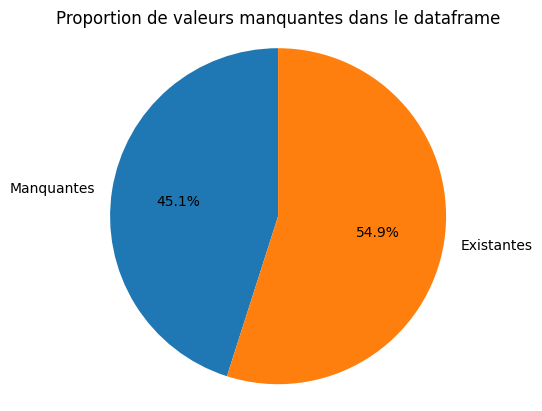

In [ ]:


# Calculer la proportion de valeurs manquantes et existantes pour chaque colonne
missing_values = merged_data.isnull().sum()
existing_values =merged_data.notnull().sum()
total_values = merged_data.shape[0]

# Créer un diagramme circulaire
fig, ax = plt.subplots()
labels = ['Manquantes', 'Existantes']
sizes = [missing_values.sum(), existing_values.sum()]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Pour s'assurer que le cercle est dessiné comme un cercle

# Ajouter un titre au diagramme
plt.title('Proportion de valeurs manquantes dans le dataframe')

plt.show()


In short, this code visualizes the structure of DataFrame newdata, displaying its shape and the distribution of column data types as a pie chart.

<Axes: >

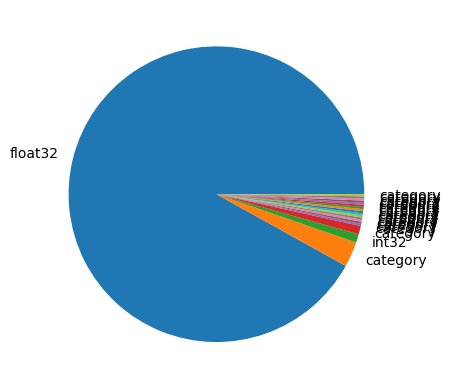

In [ ]:

merged_data.dtypes.value_counts().plot.pie()

In [ ]:

threshold = len(merged_data) * 0.1
num_columns_with_data = (merged_data.count() > threshold).sum()
print("Nombre de colonnes avec plus de 10% de valeurs non manquantes :", num_columns_with_data)
new_data= merged_data.dropna(thresh=threshold, axis=1)
print(new_data.shape)



Nombre de colonnes avec plus de 10% de valeurs non manquantes : 422
(590540, 422)


This Python code selects relevant features from a DataFrame using correlation with the targeted variable.

In [ ]:

# Calculer la corrélation entre les variables et la variable cible
correlation = merged_data.corrwith(merged_data['isFraud'])

# Sélectionner les caractéristiques avec une corrélation absolue supérieure à un seuil donné
threshold = 0.1  # Définir le seuil de corrélation
relevant_features = correlation[abs(correlation) > threshold]

# Afficher les caractéristiques sélectionnées
print("Caractéristiques sélectionnées :\n", relevant_features)
selected_features = relevant_features.index.tolist()

# Créer une nouvelle DataFrame avec seulement les caractéristiques sélectionnées
selected_data = merged_data[selected_features]

<ipython-input-16-bea209779414>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_data.corrwith(merged_data['isFraud'])


Caractéristiques sélectionnées :
 isFraud    1.000000
card3      0.154151
D7        -0.127199
D8        -0.142636
V15        0.177963
             ...   
V303       0.124287
V304       0.131498
id_01     -0.120099
id_17      0.150100
id_22      0.118409
Length: 120, dtype: float64


Given the presence of categorical variables, we move on to their encoding.

In [ ]:
#encodages
merged_data_encoded = selected_data.copy()

# Instancier LabelEncoder
label_encoder = LabelEncoder()
# Parcourir chaque colonne de votre DataFrame
for col in merged_data_encoded.columns:
    # Vérifier si la colonne contient des données catégoriques
    if merged_data_encoded[col].dtype =='category':
        # Appliquer LabelEncoder aux valeurs catégoriques
        merged_data_encoded[col] = label_encoder.fit_transform(merged_data_encoded[col].astype(str))
clean_data =merged_data_encoded.fillna(merged_data_encoded.mean())
target=clean_data['isFraud']
features = clean_data.drop(columns=['isFraud'])

Our dataset has large dimensions. We will use the PCA to reduce its dimensions. This Python code displays the percentage of variance explained relative to the number of principal components in a principal component analysis (PCA). The graph shows the proportion of total data variance explained by each principal component. The curve is generally descending, meaning that the first principal components explain the majority of the variance.

The inflection point of the curve, often called the "elbow", can be used to choose the number of principal components to retain. Indeed, the principal components after the bend generally explain a relatively small proportion of variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
# Create an object PCA
pca = PCA()
# Adapt PCA to standardized
pca.fit(scaled_data)



PCA()

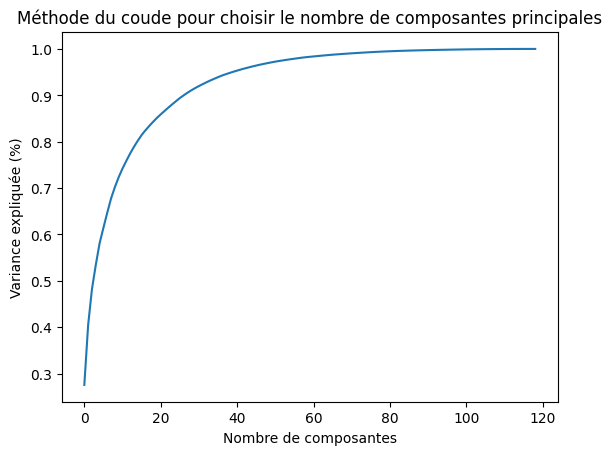

In [ ]:

explained_variance_ratio = pca.explained_variance_ratio_


plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.title('Elbow method for selecting the number of principal components')

plt.axvline(x=30, color='r', linestyle='--')
plt.show()

In [ ]:
nombre_composantes=30
# Créer un nouvel objet PCA avec le nombre optimal de composantes
pca_optimal = PCA(nombre_composantes)
data_reduit = pca_optimal.fit_transform(scaled_data)
data_reduit_df = pd.DataFrame(data_reduit, columns=[f'Component_{i+1}' for i in range(nombre_composantes)])
print(type(target))
X = data_reduit_df
y =target
data_reduit_df.head()
 #apres ca tracer un graphique montrant que the imbalance of the class et aussi a faire l'undersampling



<class 'pandas.core.series.Series'>


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27,Component_28,Component_29,Component_30
0,-1.702729,0.122807,-0.023935,-2.091893,-0.044283,-0.297328,-0.095332,-0.142304,-0.104978,0.176493,...,0.191418,0.070232,0.053192,-0.236242,0.061024,-0.073285,-0.109457,0.083012,0.022609,0.045751
1,-2.144531,0.043000,0.075045,-2.779891,0.062279,-0.256456,0.009157,-0.163554,0.206664,0.187732,...,0.126292,0.012322,0.007952,-0.046923,-0.005498,0.068791,0.108526,0.022820,-0.040074,-0.060376
2,-2.144132,0.042337,0.077177,-2.779236,0.062518,-0.256181,0.008391,-0.162880,0.206289,0.188370,...,0.125982,0.012545,0.008543,-0.047709,-0.005726,0.068115,0.107484,0.023320,-0.039824,-0.059228
3,-2.208143,-0.001541,0.028420,-2.708570,0.125448,-0.173862,-0.160481,-0.303223,0.405632,0.460478,...,-0.246722,0.015114,-0.018551,0.032569,-0.145956,0.030949,0.079467,-0.258199,0.077501,-0.086118
4,0.178201,-5.498722,-6.930497,-0.168612,0.279037,0.850221,4.422510,-1.525268,0.433224,-1.558291,...,-0.610876,1.454245,-0.397062,0.175434,-0.840311,-0.293747,-0.045232,-0.063564,0.649712,0.104651


This Python code implements the training of Random forest and Xgboosts classifiers for classification with optimal parameter search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle

def train_random_forest_classification(X, y,param_grid):
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Définir les paramètres à rechercher
    #param_grid = {
        #'n_estimators': [100],# Nombre d'arbres à construire
        #'max_depth': [5, 10],
        #'min_samples_split': [3],       # Nombre minimum d'échantillons requis pour diviser un nœud
        #'min_samples_leaf': [3]          # Nombre minimum d'échantillons requis pour être une feuille
    #}

    # Créer un modèle Random Forest
    model = RandomForestClassifier(random_state=42)

    # Utiliser une validation croisée (cross-validation) avec GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train,y_train)

    # Afficher les meilleurs paramètres
    print("Meilleurs paramètres trouvés:", grid_search.best_params_)

    # Faire des prédictions sur l'ensemble de test avec les meilleurs paramètres
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculer l'exactitude (accuracy) pour évaluer les performances du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Afficher le rapport de classification
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Retourner les prédictions sur l'ensemble de test
    return y_test,y_pred,accuracy


In [ ]:
y_testRFinitial, y_predRFinitial,accuracyRFinitial = train_random_forest_classification(X, y,param_grid = {
        'n_estimators': [120,150],# Nombre d'arbres à construire
        'max_depth': [10],
        'min_samples_split': [3],       # Nombre minimum d'échantillons requis pour diviser un nœud
        'min_samples_leaf': [3]          # Nombre minimum d'échantillons requis pour être une feuille
    })

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Meilleurs paramètres trouvés: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 120}
Accuracy: 0.9709672503132726
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    113866
           1       0.89      0.22      0.35      4242

    accuracy                           0.97    118108
   macro avg       0.93      0.61      0.67    118108
weighted avg       0.97      0.97      0.96    118108



In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report

def train_xgboost_classification(X, y,param_grid):
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer un objet DMatrix pour XGBoost (pour une utilisation optimisée de la mémoire)
    dtrain = xgb.DMatrix(X_train, label=y_train)

    # Définir les paramètres à rechercher
    #param_grid = {
     #   'max_depth': [3, 5, 7],             # Profondeur maximale de chaque arbre
      #  'learning_rate': [0.1, 0.01], # Taux d'apprentissage (learning rate)
       # 'n_estimators': [120]       # Nombre d'arbres à construire
    #}

    # Créer un modèle XGBoost
    model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)  # Spécifier l'objectif de classification binaire

    # Utiliser une validation croisée (cross-validation) avec GridSearchCV
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)  # Validation croisée avec 3 plis
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs paramètres
    print("Meilleurs paramètres trouvés:", grid_search.best_params_)

    # Faire des prédictions sur l'ensemble de test avec les meilleurs paramètres
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculer l'exactitude (accuracy) pour évaluer les performances du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Afficher le rapport de classification
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Retourner les prédictions sur l'ensemble de test
    return y_test,y_pred,accuracy


In [ ]:
y_testXGBinitial,y_predXGBinitial,accuracyXGB=train_xgboost_classification(X, y,param_grid = {
        'max_depth': [5, 7,9],             # Profondeur maximale de chaque arbre
        'learning_rate': [0.1], # Taux d'apprentissage (learning rate)
        'n_estimators': [120]       # Nombre d'arbres à construire
    })

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Meilleurs paramètres trouvés: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 120}
Accuracy: 0.9732871609035798
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    113866
           1       0.87      0.30      0.45      4242

    accuracy                           0.97    118108
   macro avg       0.92      0.65      0.72    118108
weighted avg       0.97      0.97      0.97    118108



As our dataset is unbalanced, we will apply sampling methods (sub-sampling to be more precise) such as Tomeks Links and random undersampling. Below is a function that will enable us to visualize the class imbalance before and after sampling.

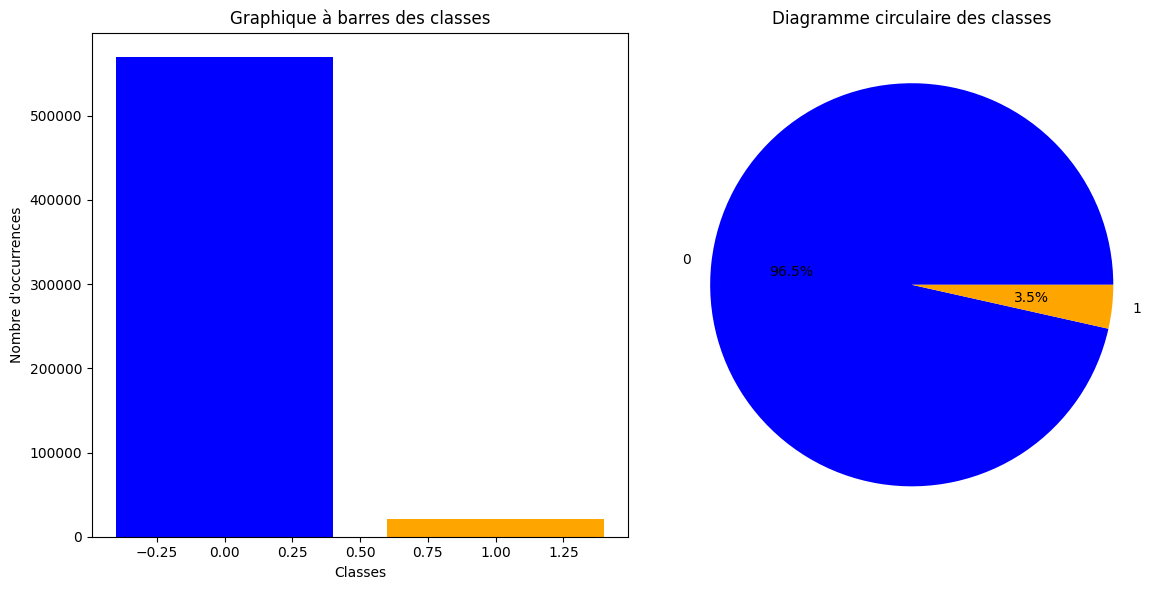

In [ ]:
from collections import Counter
def show_graphics_classes(X, y):
    """
    Affiche un graphique à barres et un diagramme circulaire des classes.

    Paramètres :
    X (DataFrame) : DataFrame contenant les caractéristiques.
    y (Series) : Série contenant les étiquettes de classe.

    """
    # Count the occurrences of each class in  target variable
    class_counts = Counter(y)

    # Create a figure and axes for graphs
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Bar graph
    axes[0].bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange'])
    axes[0].set_title('Graphique à barres des classes')
    axes[0].set_xlabel('Classes')
    axes[0].set_ylabel('Nombre d\'occurrences')

    # Pie chart
    axes[1].pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['blue', 'orange'])
    axes[1].set_title('Class pie chart')

    # Adjust figure format
    plt.tight_layout()

    # Display graphics
    plt.show()

# Use function
show_graphics_classes(X,y)

In [ ]:
#Solving the imbalance problem
# Subsampling by Tomeks links
X = data_reduit_df
y =target
# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tomek_under = TomekLinks(sampling_strategy='auto')
X_tomek_under , y_tomek_under = tomek_under.fit_resample(X,y)

# check class distribution after resampling

print( "before Tomeks links : ", Counter(y))
print("after Tomeks links: ",Counter(y_tomek_under))

before Tomeks links :  Counter({0: 569877, 1: 20663})
after Tomeks links:  Counter({0: 568492, 1: 20663})


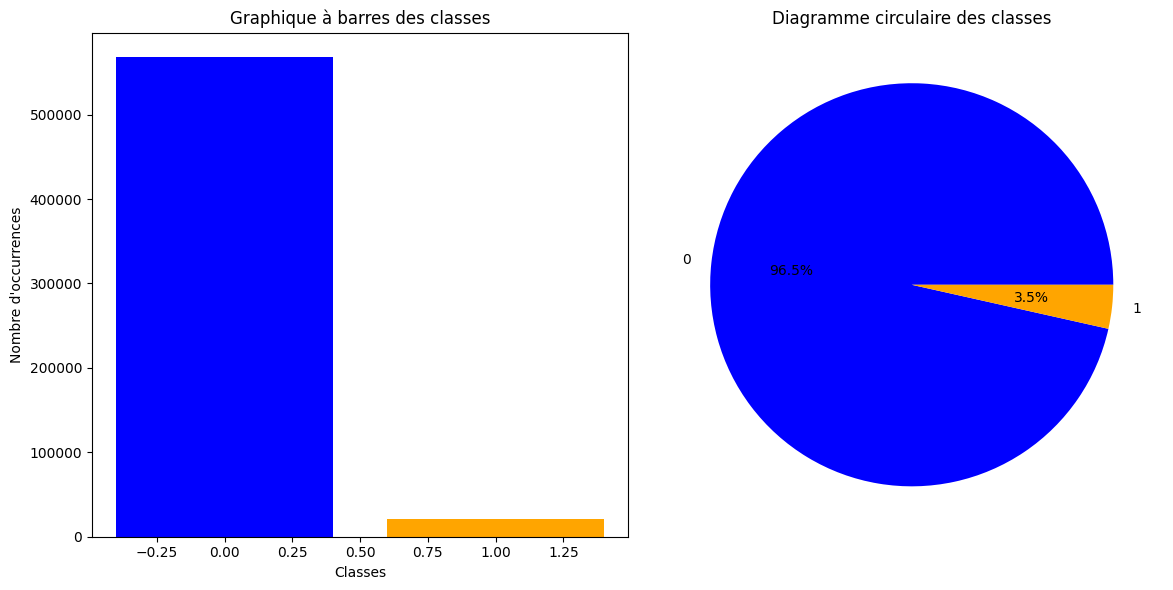

In [ ]:
show_graphics_classes(X_tomek_under , y_tomek_under)

Before Random Undersampling:  Counter({0: 569877, 1: 20663})
Before Random Undersampling:  Counter({0: 20663, 1: 20663})


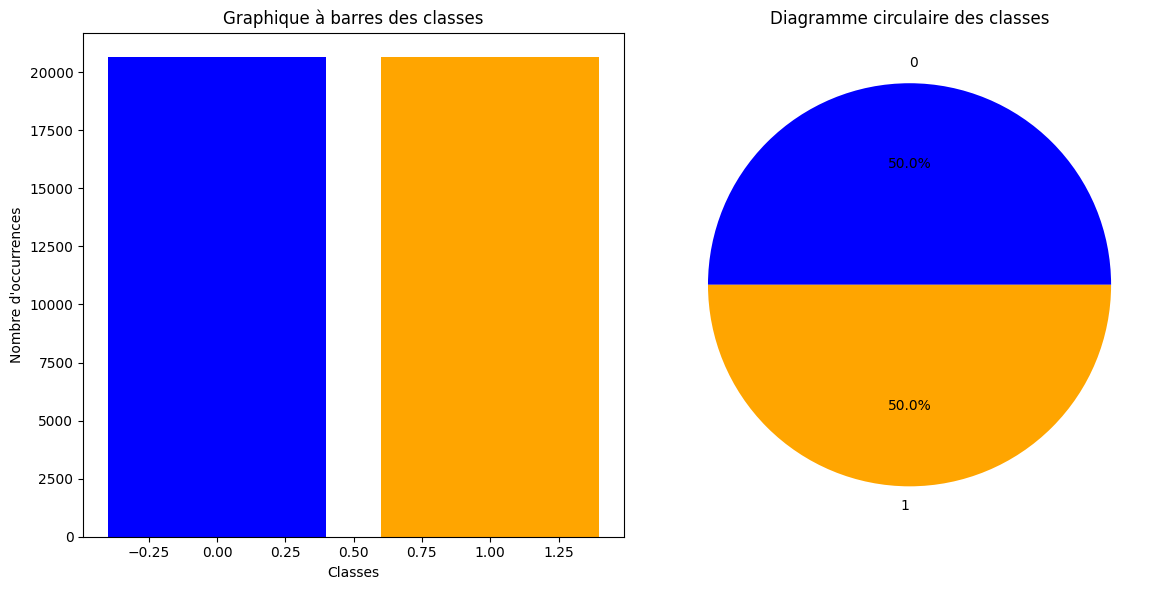

In [ ]:
#  By Random undersampling
from imblearn.under_sampling import RandomUnderSampler
RUS_under = RandomUnderSampler(random_state = 42)
X_RUS_under, Y_RUS_under = RUS_under.fit_resample(X,y)
#check after resampling

print("Before Random Undersampling: ", Counter(y))
print("Before Random Undersampling: ", Counter(Y_RUS_under))
show_graphics_classes(X_RUS_under,Y_RUS_under)


In [ ]:
y_testXGBRUS, y_predXGBRFRUS,accuracyXGBRUS=train_xgboost_classification(X_RUS_under, Y_RUS_under,param_grid = {
        'max_depth': [9],             # Maximal depth of each tree
        'learning_rate': [0.1,0.01], #  (learning rate)
        'n_estimators': [150,160] })      # Number of trees to build

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleurs paramètres trouvés: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 160}
Accuracy: 0.766271473505928
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      4127
           1       0.81      0.69      0.75      4139

    accuracy                           0.77      8266
   macro avg       0.77      0.77      0.76      8266
weighted avg       0.77      0.77      0.76      8266



In [ ]:
y_testRFRUS, y_predRFRUS,accuracyRFRUS = train_random_forest_classification(X_RUS_under, Y_RUS_under,param_grid = {
        'n_estimators': [150],# Number of trees to build
        'max_depth': [10,14],
        'min_samples_split': [3],       # Minimum number of samples required to divide a node
        'min_samples_leaf': [3,5]          # Minimum number of samples required to be a leaf
    })

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleurs paramètres trouvés: {'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 150}
Accuracy: 0.7650616985240746
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      4127
           1       0.81      0.69      0.75      4139

    accuracy                           0.77      8266
   macro avg       0.77      0.77      0.76      8266
weighted avg       0.77      0.77      0.76      8266



In [ ]:
y_testXGBTomek,y_predXGBTomek,accuracyXGBTomek=train_xgboost_classification(X_tomek_under , y_tomek_under,param_grid = {
        'max_depth': [7,9],             # Profondeur maximale de chaque arbre
        'learning_rate': [0.1], # Taux d'apprentissage (learning rate)
        'n_estimators': [150,170] })

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleurs paramètres trouvés: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 170}
Accuracy: 0.9747859222106237
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113723
           1       0.87      0.32      0.47      4108

    accuracy                           0.97    117831
   macro avg       0.93      0.66      0.73    117831
weighted avg       0.97      0.97      0.97    117831



In [ ]:
y_testRFTomek,y_predRFTomek,accuracyRFTomek=train_random_forest_classification(X_tomek_under , y_tomek_under,param_grid = {
        'n_estimators': [120,150],# Nombre d'arbres à construire
        'max_depth': [10],
        'min_samples_split': [3],       # Nombre minimum d'échantillons requis pour diviser un nœud
        'min_samples_leaf': [3]          # Nombre minimum d'échantillons requis pour être une feuille
    })

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Meilleurs paramètres trouvés: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 120}
Accuracy: 0.9722399029117974
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    113723
           1       0.90      0.23      0.36      4108

    accuracy                           0.97    117831
   macro avg       0.94      0.61      0.68    117831
weighted avg       0.97      0.97      0.96    117831



 We'll visualize graphics showing variations in performance metrics (matrix confusion) with each algorithm before and after resampling.

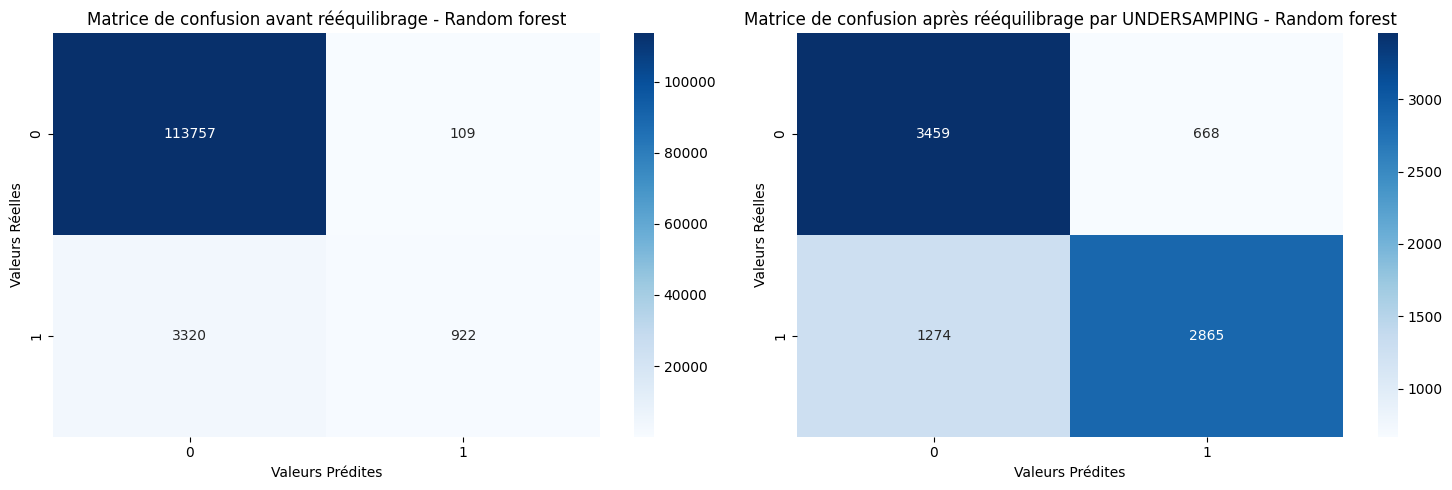

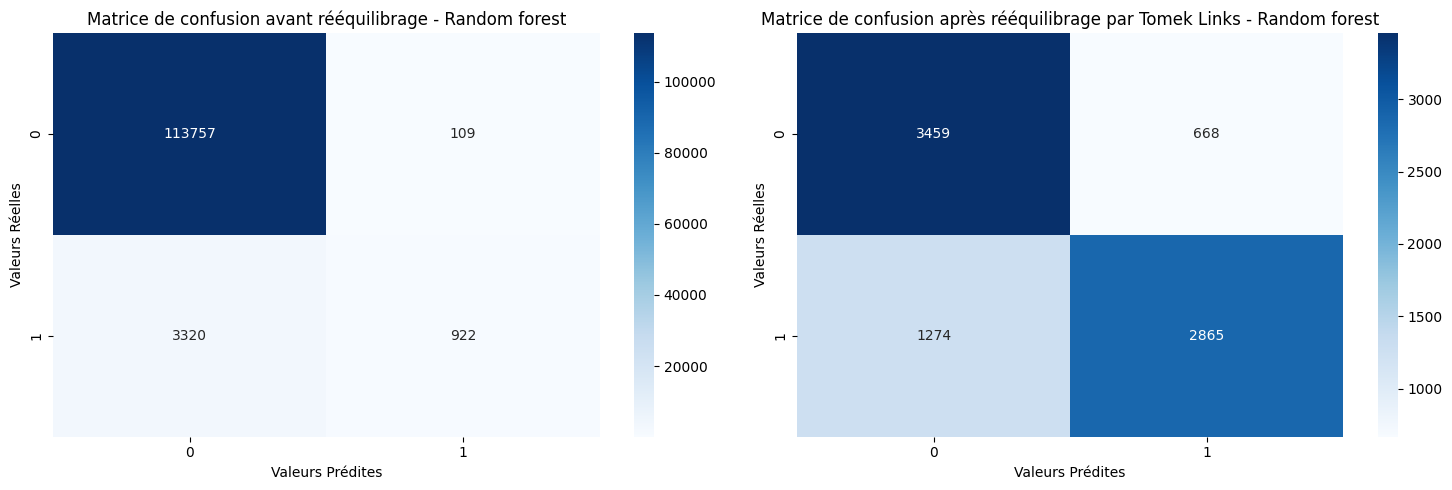

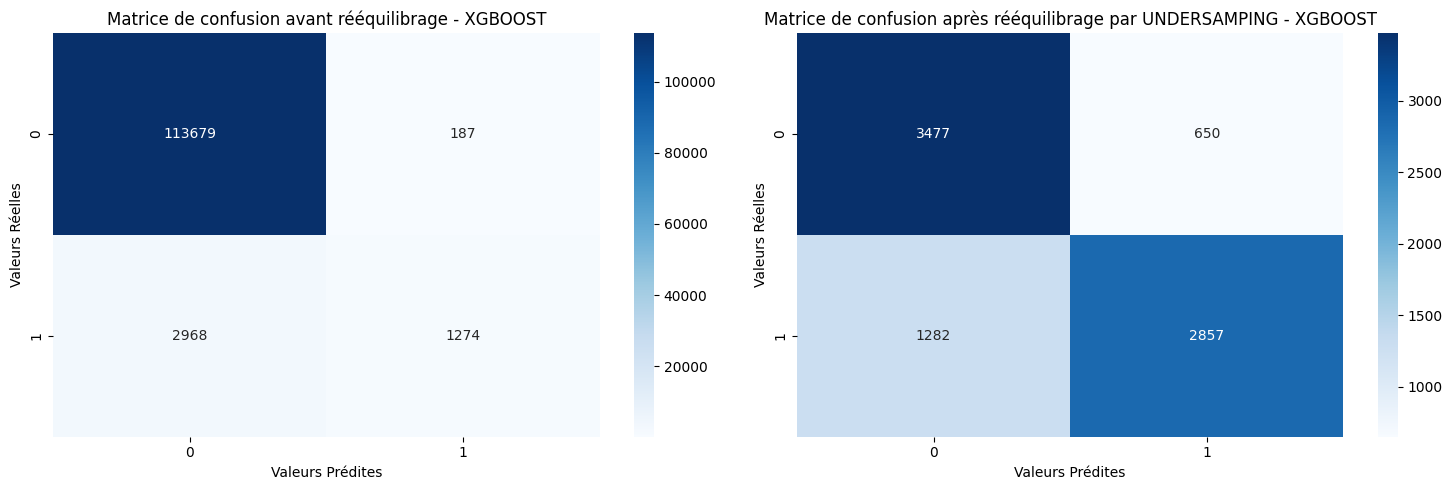

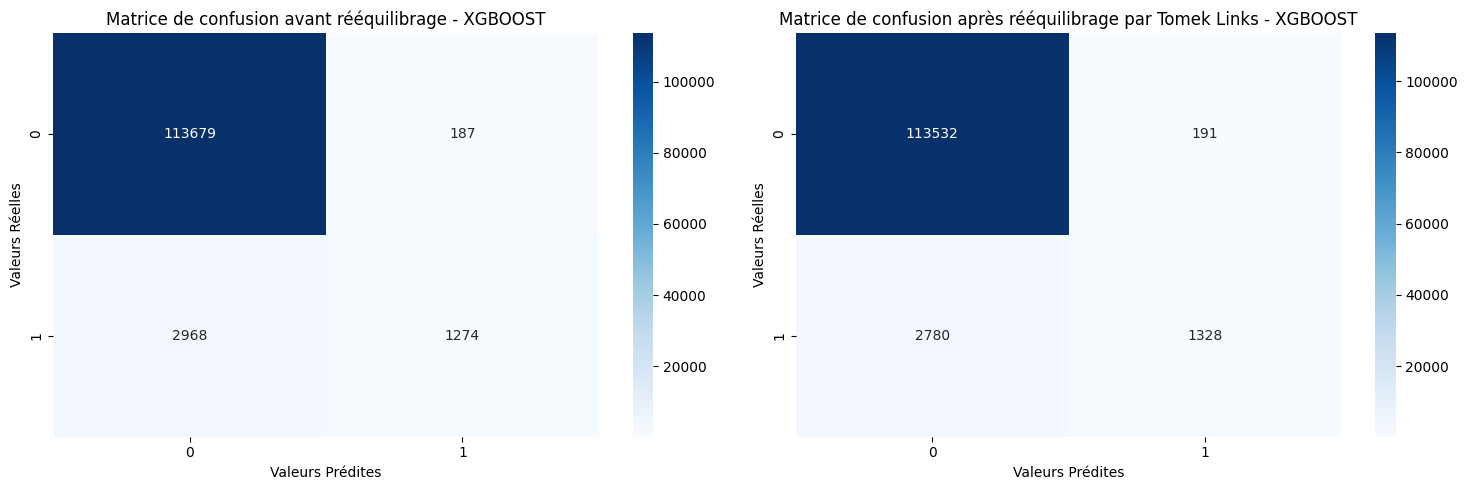

In [ ]:
y_testRFinitial, y_predRFinitial,y_testRFRUS, y_predRFRUS
y_testRFinitial, y_predRFinitial,y_testRFTomek,y_predRFTomek
y_testXGBinitial,y_predXGBinitial,y_testXGBRUS, y_predXGBRFRUS
y_testXGBinitial,y_predXGBinitial,y_testXGBTomek,y_predXGBTomek



def plot_confusion_matrices(y_testbefore, y_pred_before,y_testafter, y_pred_after, algorithm_name, sampling_type_after):
    confusion_matrix_before = confusion_matrix(y_testbefore, y_pred_before)
    confusion_matrix_after = confusion_matrix(y_testafter, y_pred_after)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting confusion matrix before
    sns.heatmap(confusion_matrix_before, annot=True, fmt="d", cmap="Blues", ax=axs[0])
    axs[0].set_title(f"Confusion matrix before rebalancing - {algorithm_name}")
    axs[0].set_xlabel('Predicted Values')
    axs[0].set_ylabel('Real values')

    # Plotting confusion matrix after
    sns.heatmap(confusion_matrix_after, annot=True, fmt="d", cmap="Blues", ax=axs[1])
    axs[1].set_title(f"Confusion matrix after rebalancing by {sampling_type_after} - {algorithm_name}")
    axs[1].set_xlabel('Predicted Values')
    axs[1].set_ylabel('Real values')

    plt.tight_layout()
    plt.show()

# Utilisation de la méthode
plot_confusion_matrices(y_testRFinitial, y_predRFinitial,y_testRFRUS, y_predRFRUS, "Random forest", "UNDERSAMPING")
plot_confusion_matrices(y_testRFinitial, y_predRFinitial,y_testRFTomek,y_predRFTomek, "Random forest", "Tomek Links")
plot_confusion_matrices(y_testXGBinitial,y_predXGBinitial,y_testXGBRUS, y_predXGBRFRUS, "XGBOOST", "UNDERSAMPING")
plot_confusion_matrices(y_testXGBinitial,y_predXGBinitial,y_testXGBTomek,y_predXGBTomek, "XGBOOST", "Tomek Links")



# Utilisation de la méthode


Here we explore other algorithms: support vector machine (SVM) and KNN.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def SVM(X, y, param_grid):

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer le modèle SVM
    svm_model = SVC(kernel='linear')

    # Créer un objet GridSearchCV
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid)

    # Exécuter la grille de recherche sur les données d'entraînement
    grid_search.fit(X_train, y_train)

    # Obtenir les meilleures prédictions sur les données de test
    y_pred = grid_search.predict(X_test)

    # Calculer l'accuracy du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy"+accuracy)

    return y_test, y_pred, accuracy


In [ ]:
def train_knn_with_grid_search(X, y, param_grid):

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer le modèle k-NN
    knn = KNeighborsClassifier()

    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs paramètres
    print("Meilleurs paramètres trouvés:", grid_search.best_params_)

    # Obtenir les prédictions sur les données de test
    y_pred = grid_search.predict(X_test)

    # Calculer la précision sur les données de test
    accuracy = accuracy_score(y_test, y_pred)
    print("Précision sur les données de test:", accuracy)

    # Retourner les étiquettes de test et les prédictions du modèle
    return y_test, y_pred

In [ ]:
y_testKNN, y_predKNN=train_knn_with_grid_search(X_RUS_under, Y_RUS_under,param_grid = {'n_neighbors': [ 7,10,15]})

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres trouvés: {'n_neighbors': 15}
Précision sur les données de test: 0.7536898136946528


In [ ]:
y_testSVM, y_predSVM,accuracySVM=SVM(X_RUS_under, Y_RUS_under,param_grid = {'C': [10, 50]})

Let's explore other data rebalancing techniques.



In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Appliquer l'oversampling sur les données d'entraînement
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)


Method SMOTE


In [ ]:
from imblearn.combine import SMOTETomek
# Créer un objet SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
# Appliquer SMOTE-Tomek Links sur les données d'entraînement
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)